### Feature Description

This dataset provides a range of features describing the **technical**, **physical**, and **performance-related** characteristics of various automobiles. These features can be used for tasks like price prediction, classification, or exploratory analysis.

| Feature                       | Description                                                                                        |
| ----------------------------- | -------------------------------------------------------------------------------------------------- |
| `symboling`                   | Risk factor rating assigned by the insurance company (−3 to +3) — a higher value implies more risk |
| `normalized-losses`           | Relative average loss payment per insured vehicle (may contain missing values)                     |
| `make`                        | Manufacturer/brand of the car (e.g., Toyota, BMW, Honda)                                           |
| `fuel-type`                   | Type of fuel used by the car:                                                                      |
|     `gas` or `diesel`         |                                                                                                    |
| `aspiration`                  | Type of aspiration:                                                                                |
|     `std` = Standard          |                                                                                                    |
|     `turbo` = Turbocharged    |                                                                                                    |
| `num-of-doors`                | Number of doors on the vehicle (e.g., `two`, `four`)                                               |
| `body-style`                  | Body configuration of the car (e.g., `sedan`, `hatchback`, `convertible`)                          |
| `drive-wheels`                | Type of drive system:                                                                              |
|     `fwd` = Front-wheel drive |                                                                                                    |
|     `rwd` = Rear-wheel drive  |                                                                                                    |
|     `4wd` = Four-wheel drive  |                                                                                                    |
| `engine-location`             | Placement of the engine (`front` or `rear`)                                                        |
| `wheel-base`                  | Distance between the front and rear wheels (in inches)                                             |
| `length`                      | Overall length of the car (in inches)                                                              |
| `width`                       | Overall width of the car (in inches)                                                               |
| `height`                      | Overall height of the car (in inches)                                                              |
| `curb-weight`                 | Weight of the car without occupants or baggage (in pounds)                                         |
| `engine-type`                 | Type/design of engine (e.g., `dohc`, `ohc`, `l`)                                                   |
| `num-of-cylinders`            | Number of cylinders in the engine (e.g., `four`, `six`, `eight`)                                   |
| `engine-size`                 | Displacement of the engine in cubic centimeters (cc)                                               |
| `fuel-system`                 | Type of fuel system (e.g., `mpfi`, `2bbl`, `idi`)                                                  |
| `bore`                        | Diameter of the cylinder bore (in inches)                                                          |
| `stroke`                      | Length of the piston stroke (in inches)                                                            |
| `compression-ratio`           | Ratio of cylinder volume before and after compression                                              |
| `horsepower`                  | Engine output power (in horsepower)                                                                |
| `peak-rpm`                    | Revolutions per minute at which maximum horsepower is achieved                                     |
| `city-mpg`                    | Fuel efficiency in city driving (miles per gallon)                                                 |
| `highway-mpg`                 | Fuel efficiency on highways (miles per gallon)                                                     |
| `price`                       | **Market price of the automobile (in USD)** 💰 *(Target variable)*                                 |

# Auto Imports – Data Analysis & Price Prediction Report

### Dataset Source:

The dataset contains technical, performance, and pricing information about various imported cars. It's commonly used for regression tasks such as **automobile price prediction**.

---

## 1.Introduction

This dataset is derived from a collection of automobiles, including specifications such as engine type, body style, horsepower, and fuel efficiency. The main goal of this project is to **analyze key automotive features** and **predict the car price (`price`)** using regression models.

Such predictive insights can support **manufacturers**, **dealers**, and **consumers** in understanding what factors drive car pricing and help make informed buying or design decisions.

---

## 2.Dataset Overview

* The dataset is loaded from a single file: **`auto_imports.csv`**

* Each row represents a **unique car model**, including:

  * **Structural Attributes**: `body-style`, `length`, `width`, `curb-weight`
  * **Performance Metrics**: `horsepower`, `engine-size`, `city-mpg`
  * **Engine Details**: `engine-type`, `fuel-system`, `num-of-cylinders`
  * **Target Variable**: `price`

```python
df = pd.read_csv("auto_imports.csv")
```

---

## 3. Exploratory Data Analysis (EDA)

### Initial Checks:

* Dataset shape and column types examined.
* Summary statistics displayed using `df.describe()`.
* Checked for missing values:

```python
df.isnull().sum()
```

###  Missing Values:

| Column     | Missing Count |
| ---------- | ------------- |
| `peak-rpm` | 2             |
| All others | 0             |

Only **`peak-rpm`** had missing values (2 entries), which can be handled via **imputation or row removal**.

### Distribution Analysis:

* **Visualizations** showed how `price` varies across:

  * Car `make` and `body-style`
  * `engine-location`, `drive-wheels`
  * `horsepower`, `engine-size`, and `curb-weight`
* **Boxplots** helped detect price outliers.
* **Correlation heatmaps** revealed strong relationships:

  * `price` vs `engine-size`, `horsepower`, `curb-weight`

---

## 4.Feature Engineering

* Dropped redundant or non-informative columns if necessary.
* **Categorical encoding** applied for features like `make`, `fuel-type`, `aspiration`, `body-style`, etc.
* Checked and handled **feature correlations**:

  * `engine-size` and `horsepower` strongly correlated with `price`.
* **Missing values** in `peak-rpm` handled using median imputation.
* **Scaling** performed using `StandardScaler` for numerical stability in ML models.

---

## 5. Model Comparison

Several machine learning models were tested to predict the **`price`** of a car using relevant features.

### Evaluation Metrics:

* **RMSE**: Root Mean Squared Error
* **R² Score**: Coefficient of Determination

### Model Performance:

| Model                 | RMSE           | R² Score |
| --------------------- | -------------- | -------- |
| **Bagging Regressor** | 3,426,720.40   | 0.97     |
| **Random Forest**     | 3,441,094.98   | 0.97     |
| **XGBoost**           | 3,749,572.50   | 0.97     |
| **Gradient Boosting** | 4,049,727.94   | 0.96     |
| **AdaBoost**          | 5,647,319.80   | 0.95     |
| **Decision Tree**     | 8,661,237.20   | 0.92     |
| **Linear Regression** | 9,972,269.99   | 0.91     |
| **KNN Regressor**     | 28,642,589.42  | 0.74     |
| **SVR**               | 127,569,354.13 | -0.14    |

---

### Best Model Summary

* **Bagging, Random Forest, and XGBoost** performed the best with **R² ≈ 0.97** and **low RMSE**.
* **Linear Regression** and **Decision Tree** gave decent results but showed signs of underfitting/overfitting.
* **SVR** performed poorly with negative R², indicating it's not suitable for this dataset without tuning.

**Recommendation:**

* For **best generalization** and accuracy, use **Random Forest** or **XGBoost**.
* If **interpretability** is more important, consider **Linear Regression**.

---

## 6.Challenges Faced

* **Missing Values**: Only `peak-rpm` had missing entries; imputed using the median.
* **Outliers**: Car prices showed extreme variations across luxury vs economy brands.
* **Feature Correlation**: `engine-size`, `horsepower`, and `curb-weight` showed strong multicollinearity.
* **Categorical Encoding**: Required proper mapping to feed into ML models.
* **Model Tuning**: Tree-based models like Random Forest required tuning `max_depth` and `n_estimators` to prevent overfitting.


# import libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df = pd.read_csv("auto_imports.csv")

In [3]:
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
col_names= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]  

In [5]:
df.columns = col_names

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Preprocessing

In [7]:
# replacing ? with NaN
df1 = df.replace('?', np.NaN)
df1.shape

(200, 26)

In [8]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [9]:
# dropping rows that contains doesnt have price value
df = df1.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


In [10]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### Insight:

* **Price** varies widely (₹5.1K – ₹45.4K), avg ₹13.2K
* **Engine size & weight** have large spread
* **Fuel efficiency**: City (13–49 MPG), Highway (16–54 MPG)
* **Dimensions** mostly compact to mid-size
* **Compression ratio** & **symboling** show notable variation


In [11]:
a = df.isnull().sum()
a[a>0]

normalized-losses    36
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [12]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')  # convert to float
df["normalized-losses"].fillna(df["normalized-losses"].mean(), inplace=True) 

In [13]:
df['normalized-losses']

0      122.0
1      122.0
2      164.0
3      164.0
4      122.0
       ...  
195     95.0
196     95.0
197     95.0
198     95.0
199     95.0
Name: normalized-losses, Length: 200, dtype: float64

In [14]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [15]:
df['num-of-doors'].value_counts().index[0]

'four'

In [16]:
df['num-of-doors'].replace(np.nan, "four", inplace=True)

In [17]:
df['num-of-doors']

0       two
1       two
2      four
3      four
4       two
       ... 
195    four
196    four
197    four
198    four
199    four
Name: num-of-doors, Length: 200, dtype: object

In [18]:
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')  # convert to float
df['bore'].fillna(df['bore'].mean(), inplace=True)  

In [19]:
df['bore']

0      3.47
1      2.68
2      3.19
3      3.19
4      3.19
       ... 
195    3.78
196    3.78
197    3.58
198    3.01
199    3.78
Name: bore, Length: 200, dtype: float64

In [20]:
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')  # convert to float
df['stroke'].fillna(df['stroke'].mean(), inplace=True)       # replace NaN with mean

In [21]:
df['stroke']

0      2.68
1      3.47
2      3.40
3      3.40
4      3.40
       ... 
195    3.15
196    3.15
197    2.87
198    3.40
199    3.15
Name: stroke, Length: 200, dtype: float64

In [22]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # convert to float
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)     

In [23]:
df['horsepower'] 

0      111.0
1      154.0
2      102.0
3      115.0
4      110.0
       ...  
195    114.0
196    160.0
197    134.0
198    106.0
199    114.0
Name: horsepower, Length: 200, dtype: float64

In [24]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # convert to float
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [25]:
df['horsepower']

0      111.0
1      154.0
2      102.0
3      115.0
4      110.0
       ...  
195    114.0
196    160.0
197    134.0
198    106.0
199    114.0
Name: horsepower, Length: 200, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

### Insight:

* 200 rows, 26 columns
* 15 numeric, 11 categorical features
* Only `peak-rpm` has missing values and wrong data type
* Dataset is mostly clean and ready for preprocessing


In [27]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Insight:

* No missing values in most columns
* Only **`peak-rpm`** has **2 missing values**
* Data is clean and ready for modeling


# Data Visualization
# Univariate Analysis

In [28]:
makers = df['make'].value_counts().index

In [29]:
model_count = df['make'].value_counts().values

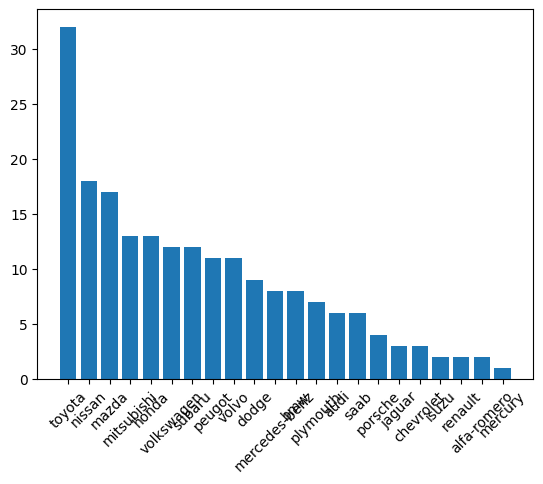

In [30]:
import matplotlib.pyplot as plt
plt.bar(makers, model_count)
plt.xticks(rotation=45)
plt.show()


In [31]:
df[['make', 'fuel-type']].groupby(['make', 'fuel-type']).size().reset_index()

,make,fuel-type,0
0,alfa-romero,gas,2
1,audi,gas,6
2,bmw,gas,8
3,chevrolet,gas,3
4,dodge,gas,9
5,honda,gas,13
6,isuzu,gas,2
7,jaguar,gas,3
8,mazda,diesel,2
9,mazda,gas,15


In [32]:
make_price = df[['make', 'price']].sort_values(by=['price'], ascending=False)
make_price.head()

,make,price
70,mercedes-benz,45400
14,bmw,41315
69,mercedes-benz,40960
124,porsche,37028
15,bmw,36880


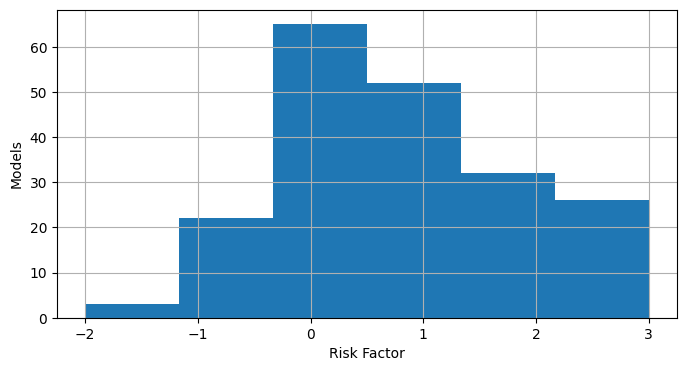

In [33]:
plt.figure(figsize=(8,4))
plt.hist(df['symboling'], bins=6)
plt.xlabel('Risk Factor')
plt.ylabel('Models')
plt.grid()
plt.show()

### Insights:
 **Risk Factor**: Normally distributed; most cars fall between -1 and 2.

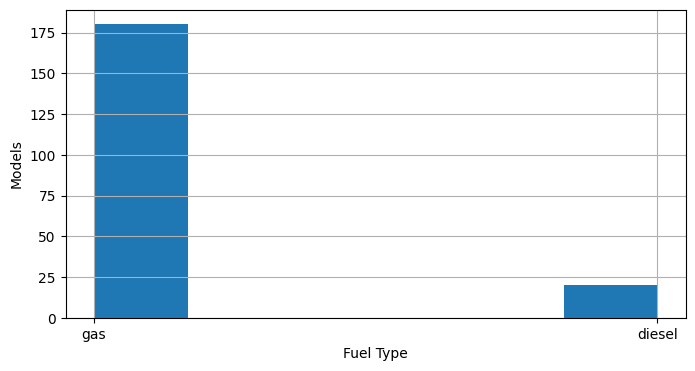

In [34]:
x = df['fuel-type'].value_counts().index
y = df['fuel-type'].value_counts().values

plt.figure(figsize=(8,4))
plt.hist(df['fuel-type'], bins=6)
plt.xlabel('Fuel Type')
plt.ylabel('Models')
plt.grid()
plt.show()

### Insights:
**Fuel Type**: Majority are **gas** cars; **diesel** is rare.

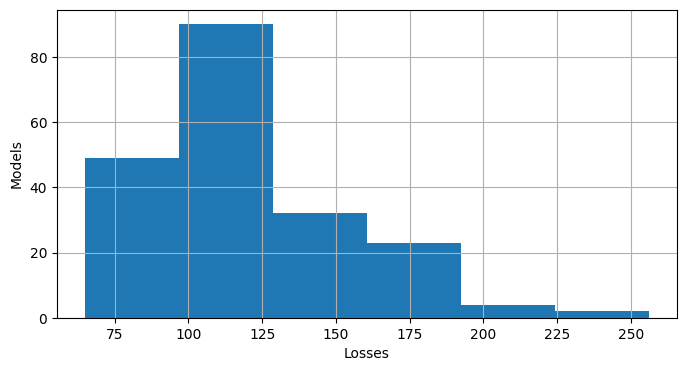

In [35]:
plt.figure(figsize=(8,4))
plt.hist(df['normalized-losses'], bins=6 )#color='yellow')
plt.xlabel('Losses')
plt.ylabel('Models')
plt.grid()
plt.show()

### Insights:
**Losses**: Right-skewed; most cars have moderate losses, few with high losses.

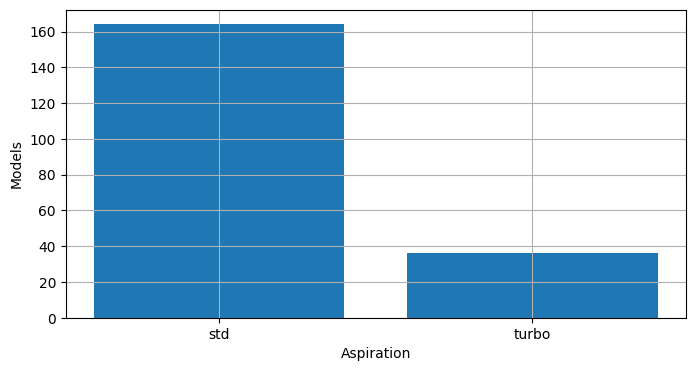

In [36]:
x = df['aspiration'].value_counts().index
y = df['aspiration'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.xlabel('Aspiration')
plt.ylabel('Models')

plt.grid()
plt.show()

### Insights:
**Aspiration**: Mostly standard; few turbo.

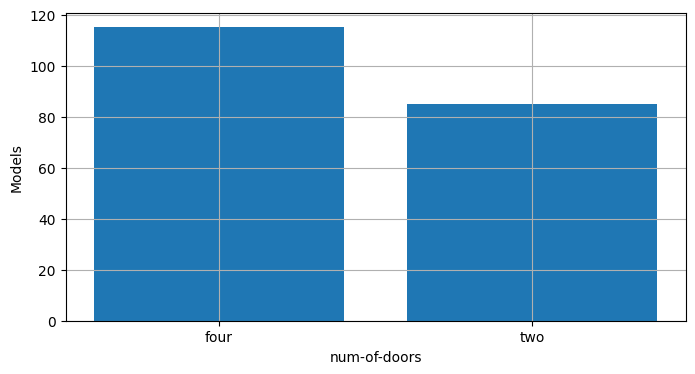

In [37]:
x = df['num-of-doors'].value_counts().index
y = df['num-of-doors'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.xlabel('num-of-doors')
plt.ylabel('Models')
plt.grid()
plt.show()

### Insights:
**Doors**: Four-door cars dominate.

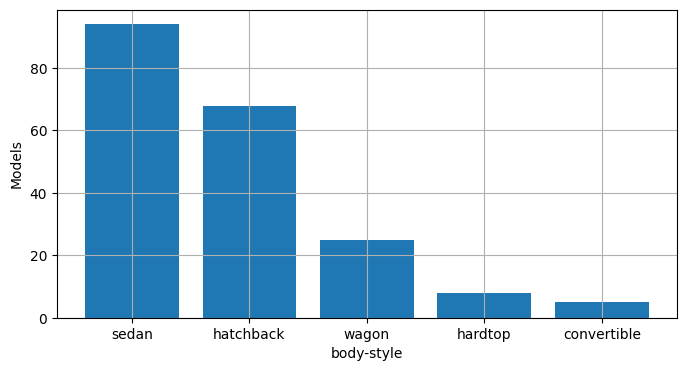

In [38]:
x = df['body-style'].value_counts().index
y = df['body-style'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.xlabel('body-style')
plt.ylabel('Models')
plt.grid()
plt.show()

### Insights:
**Body Style**: Sedan > Hatchback; others are rare.

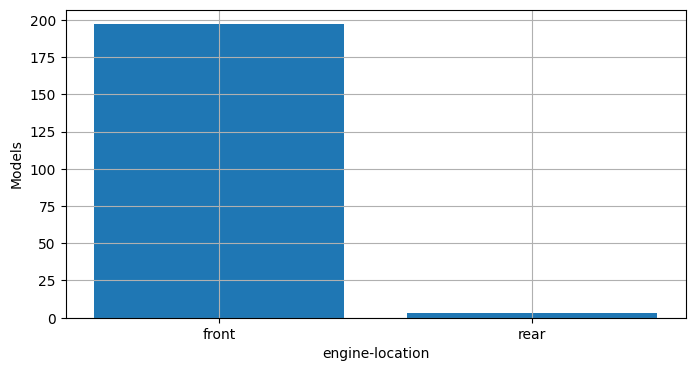

In [39]:
x = df['engine-location'].value_counts().index
y = df['engine-location'].value_counts().values

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.xlabel('engine-location')
plt.ylabel('Models')
plt.grid()
plt.show()

### Insights:
**Engine Location**: Mostly front-engine cars.

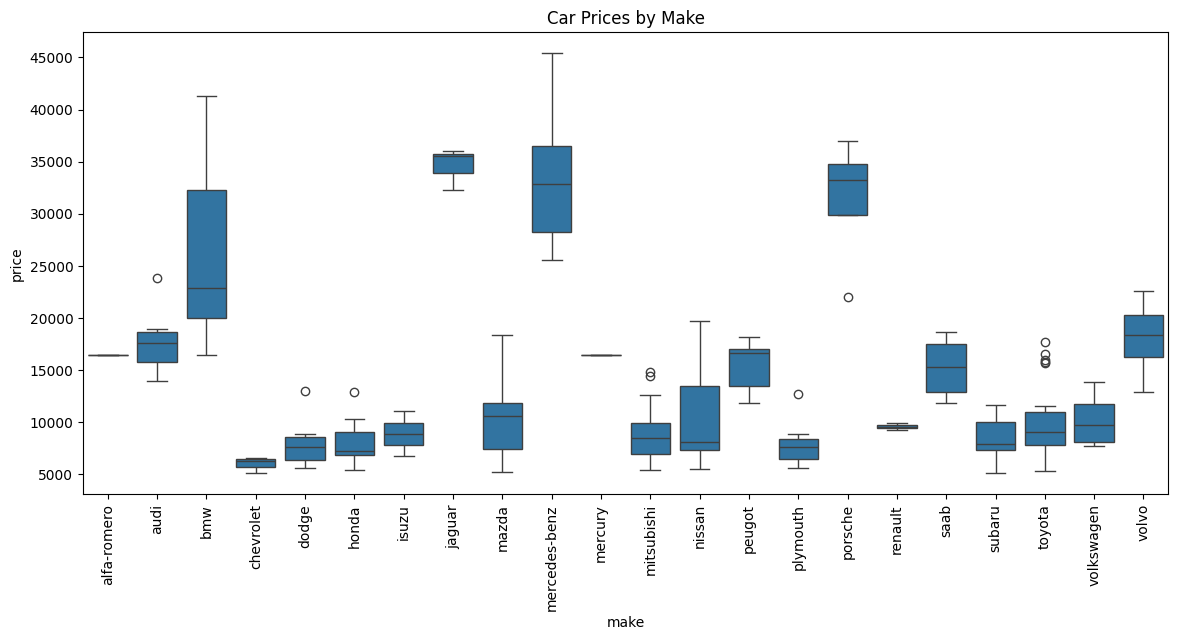

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Car Prices by Make")
plt.show()


### Insight:

* **Most expensive**: Mercedes-Benz, Jaguar, Porsche, BMW
* **Least expensive**: Chevrolet, Dodge, Plymouth, Renault
* **High price variation**: BMW, Mazda, Mercedes
* **Consistent pricing**: Renault, Saab
* **Outliers**: Seen in many brands, especially BMW and Porsche


# Handling outliers

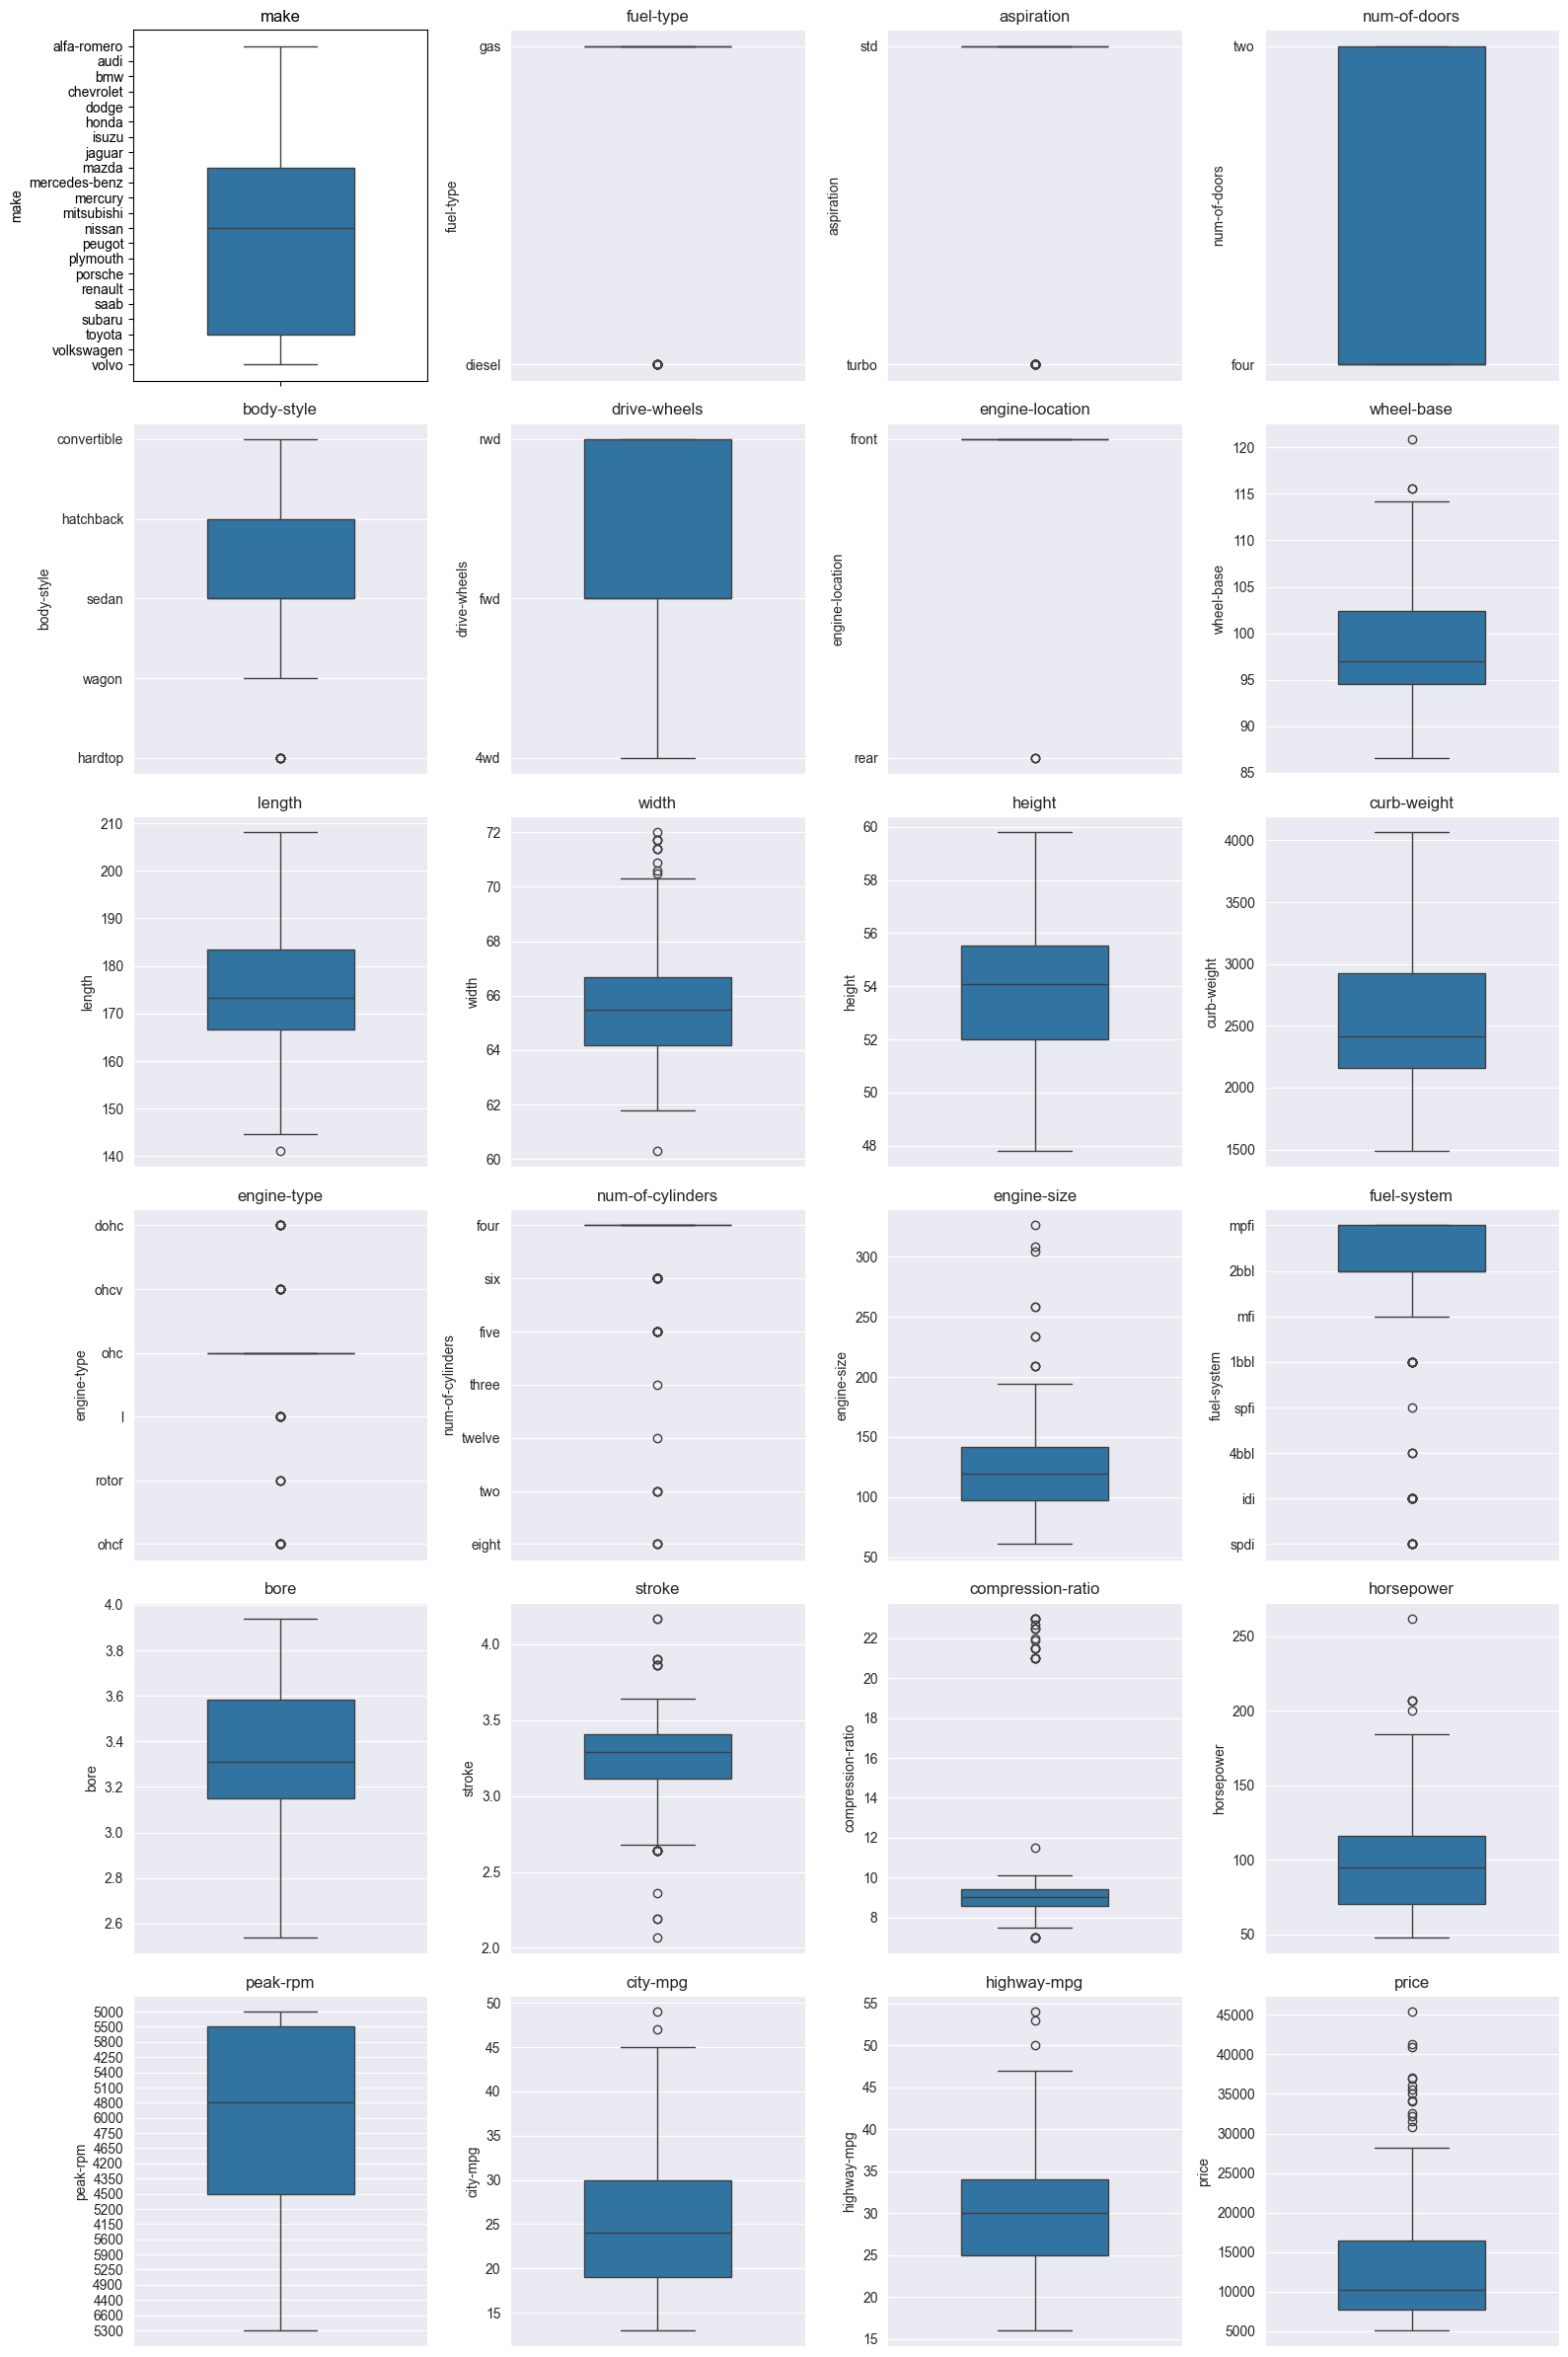

In [41]:
import math

cols_to_plot = df.columns[2:]
num_plots = len(cols_to_plot)
rows = math.ceil(num_plots / 4)  # 4 plots per row

plt.figure(figsize=(16, 4 * rows))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(rows, 4, i)
    sns.set_style("darkgrid")
    sns.boxplot(data=df, y=col, width=0.5)
    plt.title(col)
plt.tight_layout()
plt.show()



# **Box Plot Insights:**

* **Gas, FWD, 4-door cars dominate.**
* **Price, engine size, and horsepower have outliers.**
* **Most cars are compact/mid-size.**
* **Data needs encoding and normalization.**


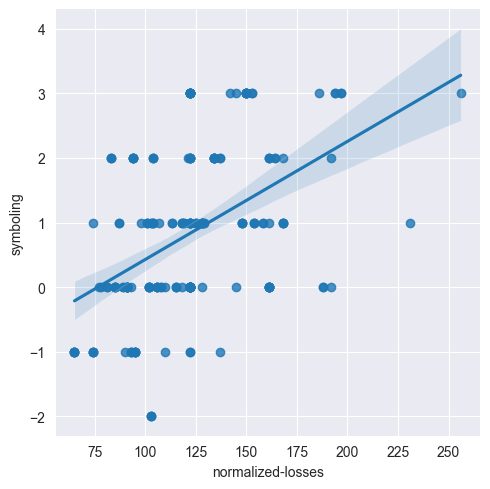

In [42]:
sns.lmplot(x='normalized-losses', y='symboling', data=df)

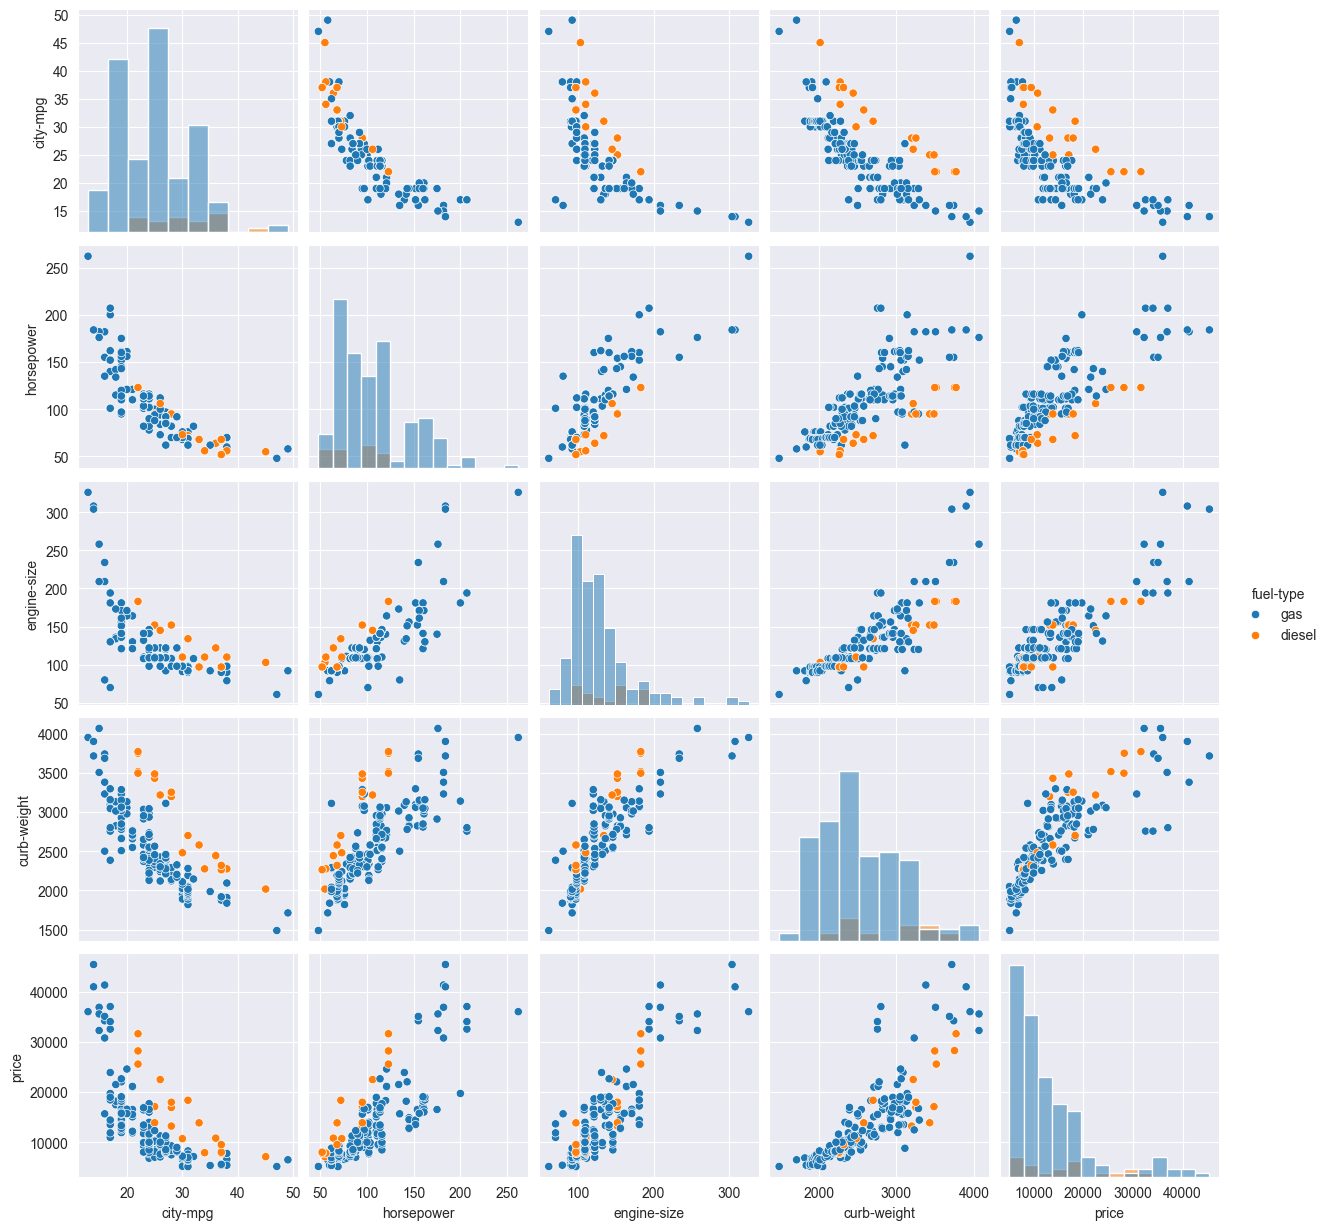

In [43]:
sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

In [44]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Modeling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, BaggingRegressor,
    ExtraTreesRegressor, GradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Split The Data

In [46]:
# Split into features and target
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=2),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=2),
    "Bagging": BaggingRegressor(n_estimators=50, random_state=2),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=2),
    "SVR": SVR(kernel='sigmoid', gamma=1.0),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(n_estimators=50, random_state=2)
}

In [48]:
# Evaluate each model
results = []
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))




In [49]:
results.sort(key=lambda x: x[1])
for name, rmse, r2 in results:
    print(f"{name:20s} | RMSE: {rmse:.2f} | R²: {r2:.2f}")

Bagging              | RMSE: 3426720.40 | R²: 0.97
Random Forest        | RMSE: 3441094.98 | R²: 0.97
XGBoost              | RMSE: 3749572.50 | R²: 0.97
Gradient Boosting    | RMSE: 4049727.94 | R²: 0.96
AdaBoost             | RMSE: 5647319.80 | R²: 0.95
Decision Tree        | RMSE: 5706001.45 | R²: 0.95
Linear Regression    | RMSE: 9972269.99 | R²: 0.91
KNN                  | RMSE: 28642589.42 | R²: 0.74
SVR                  | RMSE: 127569354.13 | R²: -0.14


### Insight:

* **Best models**: Bagging & Random Forest (lowest RMSE, R² = 0.97)
* **Good models**: XGBoost, Gradient Boosting (R² ≈ 0.96–0.97)
* **Average**: Decision Tree, AdaBoost, Linear Regression
* **Poor**: KNN (low R²), **SVR (worst, R² = -0.14)**
* **Use Bagging or Random Forest** for best results.


In [51]:
import pickle
pickle.dump(pipe,open('vectorizer.pkl', 'wb'))
pickle.dump( LinearRegression,open('model.pkl','wb'))

## 7.Conclusion

* The goal was to predict car prices using the Auto Imports dataset.
* Key features influencing price: **engine-size**, **horsepower**, and **curb-weight**.
* Most data was clean; only `peak-rpm` had missing values (easily handled).
* **Best performing models**:

  * **Random Forest**, **Bagging**, and **XGBoost** with **R² ≈ 0.97**
* Poor performing models: **SVR** and **KNN**
* Tree-based models captured non-linear patterns effectively.
* **Recommendation**: Use **Random Forest** or **XGBoost** for real-world price prediction tasks.
* ML models provided valuable insights for pricing strategy and decision-making in the auto industry.